<a href="https://colab.research.google.com/github/Pabitra-M/DataScience/blob/main/notebooks/ml_models/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
## drop unneccessary colums
df_index.drop(['year', 'month'], axis=1, inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
## null value
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


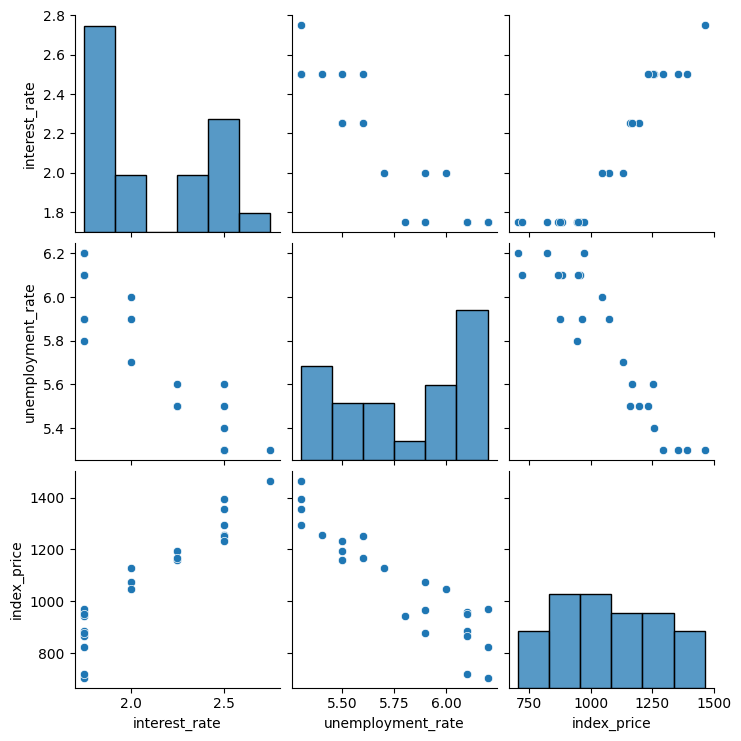

In [7]:
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


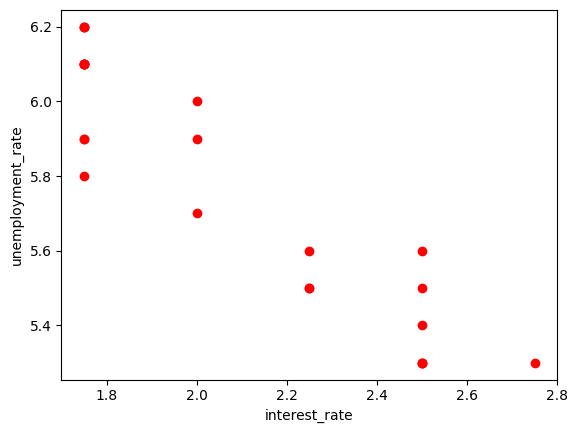

In [10]:
## visualize the datapoint more closely

plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='red')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')
plt.show()

In [11]:
## indepamdend and dependent feature
X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [13]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

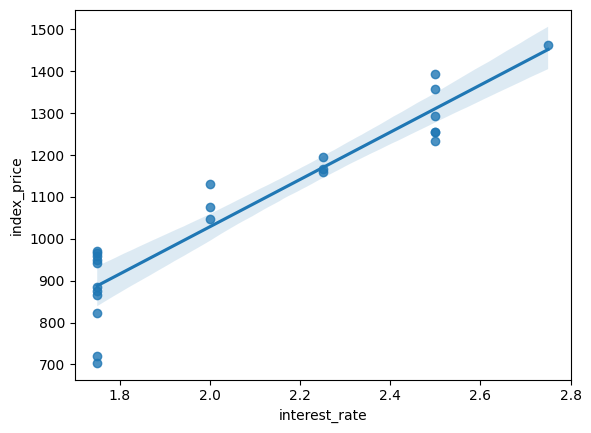

In [15]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

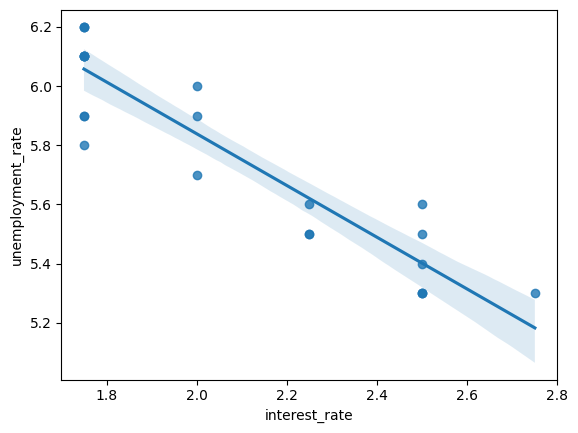

In [16]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

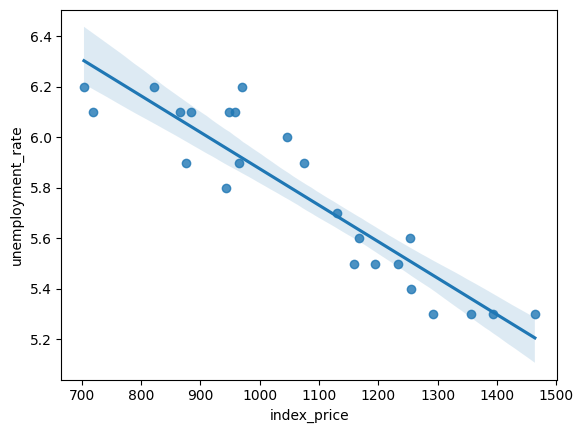

In [18]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [20]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression


In [22]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
## cross validation

from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
np.mean(validation_score)

np.float64(-5914.828180162386)

In [28]:
y_pred = regression.predict(X_test)

In [29]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [30]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE", mse)
print("MAE", mae)
print("RMSE", rmse)

MSE 5793.762887712569
MAE 59.935781523235484
RMSE 76.11677139574805


In [33]:
from sklearn.metrics import r2_score

In [35]:
score = r2_score(y_test, y_pred)
print(score)

0.8278978091457145


In [36]:
## Displ;ay Adjustend R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7131630152428576

### Assumptions

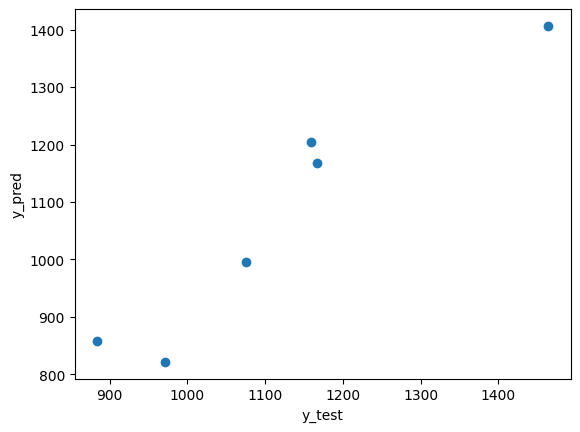

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [38]:
residuals = y_test - y_pred
print(residuals)


8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


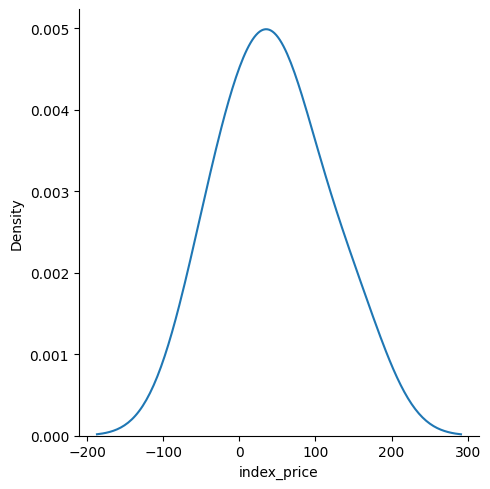

In [39]:
sns.displot(residuals, kind='kde')

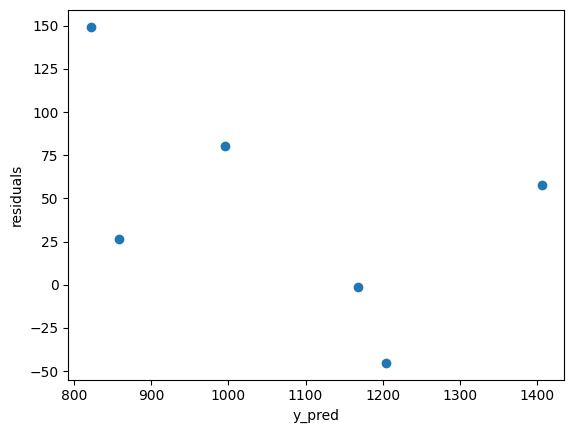

In [40]:
## scatter plot respact to prediction and residulas
plt.scatter(y_pred, residuals)
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.show()

In [41]:
## osl linear Regression

import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [42]:
prediction = model.predict(X_test)

In [43]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 18 Jul 2025   Prob (F-statistic):                       0.754
Time:                        15:43:47   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [44]:
print(regression.coef_)

[  88.27275507 -116.25716066]
